In [15]:
## Import global variables, tools, libraries and functions
import global_vars
import importlib
importlib.reload(global_vars)
execfile('global_vars.py')


/Users/nataliedouglas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: weights should have the same shape as x

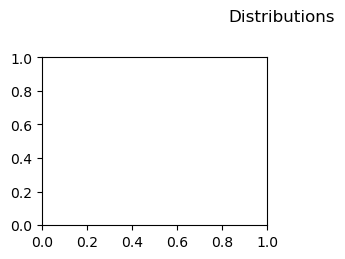

In [16]:
## Generate unrestricted and restricted ensembles

#GE = genensemble_class.genensemble_class(g_nens, g_xb, g_B_mat, g_val_bnds)
#x_ens=GE.ens
#x_ens=np.load('ideal_ensemble_50.npy') # use this for a predefined ensemble
x_ens_full=GE.ens_full
x_bar=np.mean(x_ens,1)
xfull_bar=np.mean(x_ens_full,1)

fig = plt.figure().suptitle('Distributions')
weights = np.ones_like(x_ens[0,:]) / float(len(x_ens))

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(x_ens_full[i,:], kde=True, color=g_palette[5], hist_kws={'weights': weights}, label='unrestricted')
    sns.distplot(x_ens[i,:], kde=True, color=g_palette[6], hist_kws={'weights': weights}, label='restricted')
    plt.axvline(xfull_bar[i], color=g_palette[5], linestyle='--') 
    plt.axvline(x_bar[i], color=g_palette[6], linestyle='--') 
    plt.xlabel(g_xlabels[i])  
    plt.legend()
plt.tight_layout()    

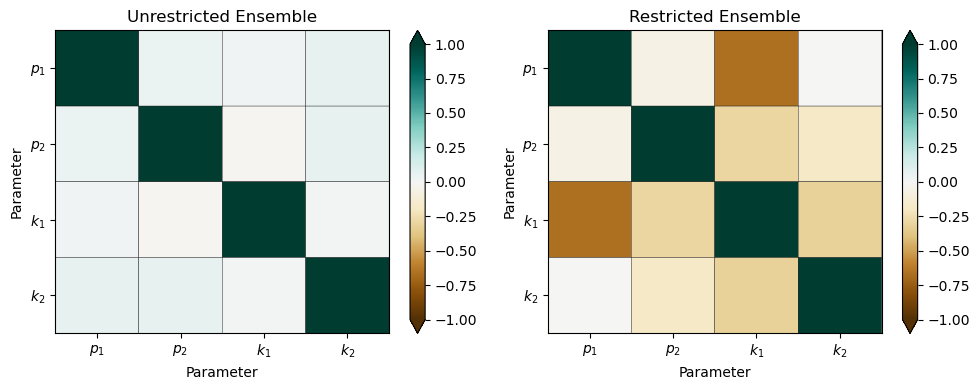

In [12]:
## Error covariance and correlation matrices
Bcov=np.cov(x_ens)
Bcov_full=np.cov(x_ens_full)
Bcorr=np.corrcoef(x_ens)
Bcorr_full=np.corrcoef(x_ens_full)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#plt.pcolor(np.array(Bcov_full).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
plt.pcolor(np.array(Bcorr_full).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
ymin, ymax = plt.ylim()
plt.ylim(ymax, ymin)
plt.colorbar(extend="both")
plt.title("Unrestricted Ensemble")
plt.xlabel("Parameter")
plt.ylabel("Parameter")
plt.xticks(np.arange(0.5, 4 + 0.5), g_xlabels)
plt.yticks(np.arange(0.5, 4 + 0.5), g_xlabels)

plt.subplot(1,2,2)
#plt.pcolor(np.array(Bcov).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
plt.pcolor(np.array(Bcorr).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
ymin, ymax = plt.ylim()
plt.ylim(ymax, ymin)
plt.colorbar(extend="both")
plt.title("Restricted Ensemble")
plt.xlabel("Parameter")
plt.ylabel("Parameter")
plt.xticks(np.arange(0.5, 4 + 0.5), g_xlabels)
plt.yticks(np.arange(0.5, 4 + 0.5), g_xlabels)

plt.tight_layout()

In [17]:
# Generate DA features and prior RMSE

GF = genDAfeatures_class.genDAfeatures_class(g_initstate, g_tf, g_deltat, g_forcing, x_ens)
[hxbar,hX]=[GF.hxbar,GF.hX]
[hxbar_mat,hX_mat]=[GF.hxbar_mat,GF.hX_mat]

rmse_hxbar_1 = RMSE(hxbar_mat[0],g_xtrue_noise[0])
rmse_hxbar_2 = RMSE(hxbar_mat[1],g_xtrue_noise[1])

hX_mean=np.mean(hX_mat,2)
rmse_hX_1 = RMSE(hX_mean[0],g_xtrue_noise[0])
rmse_hX_2 = RMSE(hX_mean[1],g_xtrue_noise[1])
    
## Run 4DEnVar and calculate posterior RMSE

DA=fourDEnVar_engine.fourDEnVar_engine(x_ens, hX, g_y, g_R, hxbar)
xa=DA.xa
Xa=DA.Xa
anal=DA.xa_analytical
Xanal=DA.Xa_analytical

MR = modelruns_class.modelruns_class(g_initstate, g_tf, g_deltat, g_forcing, xa)
hanal_mat = MR.xf
rmse_anal_1 = RMSE(hanal_mat[0],g_xtrue_noise[0])
rmse_anal_2 = RMSE(hanal_mat[1],g_xtrue_noise[1])

GF = genDAfeatures_class.genDAfeatures_class(g_initstate, g_tf, g_deltat, g_forcing, Xanal)
[hxbaranal_mat,hXanal_mat]=[GF.hxbar_mat,GF.hX_mat]
hXanal_mean=np.mean(hXanal_mat,2)
rmse_hXanal_1 = RMSE(hXanal_mean[0],g_xtrue_noise[0])
rmse_hXanal_2 = RMSE(hXanal_mean[1],g_xtrue_noise[1])

## Print outputs
print(g_paramtrue)
print(xa)
print('estimated:', anal)
print('estimated/true', anal/g_paramtrue)
print('RMSE in hxbar - x1:', rmse_hxbar_1)
print('RMSE in estimated - x1:', rmse_anal_1)
print('RMSE in mean of updated ensemble - x1:', rmse_hXanal_1)
print('RMSE in hxbar - x2:', rmse_hxbar_2)
print('RMSE in estimated - x2:', rmse_anal_2)
print('RMSE in mean of updated ensemble - x2:', rmse_hXanal_2)

print('test RMSE in hX - x1:', rmse_hX_1)
print('test RMSE in hX - x2:', rmse_hX_2)

shape of X_dash_b: (4, 50)
shape of Y_dash_b: (2002, 50)
Xbdash*inv(I+Ybdash^T*Rinv*Ybdash)*Xbdash^T is symmetric and all eigenvalues are positive
[1.0, 1.0, 0.2, 0.1]
[0.97891326 1.13484978 0.19839718 0.09397873]
estimated: [0.97893686 1.13467435 0.19840601 0.09397948]
estimated/true [0.97893686 1.13467435 0.99203003 0.93979482]
RMSE in hxbar - x1: 2.9567289034076847
RMSE in estimated - x1: 0.021071439945979254
RMSE in mean of updated ensemble - x1: 0.04037310655248446
RMSE in hxbar - x2: 5.251422688716047
RMSE in estimated - x2: 0.4348465918847761
RMSE in mean of updated ensemble - x2: 0.43831530788359674
test RMSE in hX - x1: 0.6793061070065417
test RMSE in hX - x2: 7.624499825876694


(0.0, 0.5)

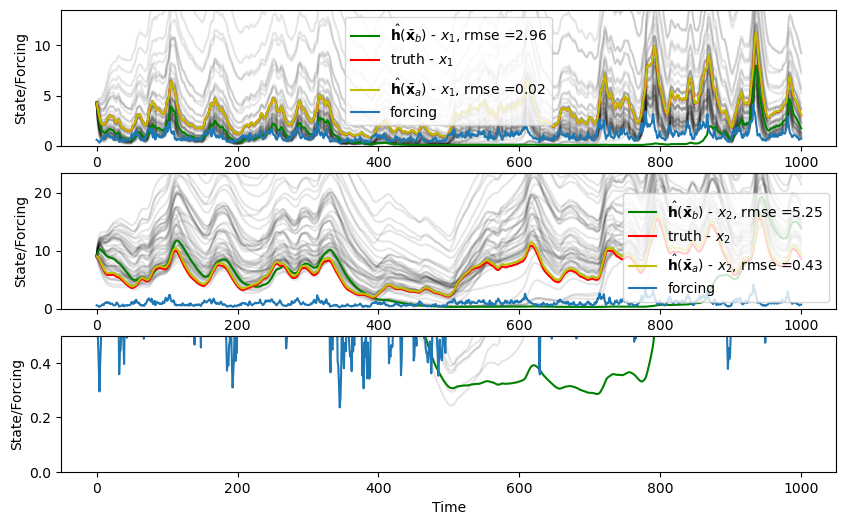

In [18]:
## Plots
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(hX_mat[0,:,:],'k', alpha=0.1)
plt.plot(g_t2,hxbar_mat[0],label=r'$\hat{\bf h}(\bar{\bf x}_b)$ - $x_1$, rmse ='+"{:.2f}".format(rmse_hxbar_1),color='g')
plt.plot(g_t2,g_xtrue_noise[0],label=r'truth - $x_1$',color='r')
plt.plot(g_t2,hanal_mat[0],label=r'$\hat{\bf h}(\bar{\bf x}_a)$ - $x_1$, rmse ='+"{:.2f}".format(rmse_anal_1),color='y')
plt.plot(g_t2,g_forcing,label='forcing')
plt.legend()
plt.ylim([0,np.max(g_xtrue_noise[0])*1.2])
plt.xlabel('Time')
plt.ylabel('State/Forcing')
plt.subplot(3,1,2)
plt.plot(hX_mat[1,:,:],'k', alpha=0.1)
plt.plot(g_t2,hxbar_mat[1],label=r'$\hat{\bf h}(\bar{\bf x}_b)$ - $x_2$, rmse ='+"{:.2f}".format(rmse_hxbar_2),color='g')
plt.plot(g_t2,g_xtrue_noise[1],label=r'truth - $x_2$',color='r')
plt.plot(g_t2,hanal_mat[1],label=r'$\hat{\bf h}(\bar{\bf x}_a)$ - $x_2$, rmse ='+"{:.2f}".format(rmse_anal_2),color='y')
plt.plot(g_t2,g_forcing,label='forcing')
plt.legend()
plt.ylim([0,np.max(g_xtrue_noise[1])*1.5])
plt.xlabel('Time')
plt.ylabel('State/Forcing')
plt.subplot(3,1,3)
plt.plot(hX_mat[1,:,:],'k', alpha=0.1)
plt.plot(g_t2,hxbar_mat[1],label=r'$\hat{\bf h}(\bar{\bf x}_b)$ - $x_2$, rmse ='+"{:.2f}".format(rmse_hxbar_2),color='g')
plt.plot(g_t2,g_xtrue_noise[1],label='truth - x2',color='r')
plt.plot(g_t2,hanal_mat[1],label=r'$\hat{\bf h}(\bar{\bf x}_a)$ - $x_2$, rmse ='+"{:.2f}".format(rmse_anal_2),color='y')
plt.plot(g_t2,g_forcing,label='forcing')
plt.xlabel('Time')
plt.ylabel('State/Forcing')
plt.ylim((0,0.5))

/Users/nataliedouglas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nataliedouglas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nataliedouglas/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

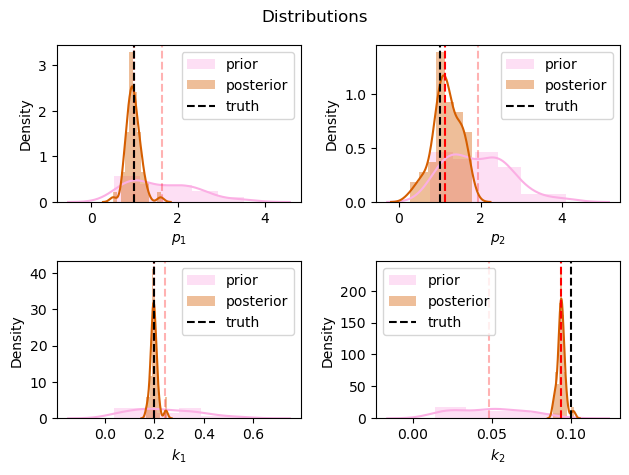

In [19]:
## Plot distributions
fig = plt.figure().suptitle('Distributions')
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(x_ens[i,:], kde=True, color=g_palette[6], hist_kws={'weights': weights}, label='prior')
    plt.axvline(x_bar[i], color='r', linestyle='--',alpha=0.3) 
    sns.distplot(Xa[i,:], kde=True, color=g_palette[3], hist_kws={'weights': weights}, label='posterior')
    plt.axvline(xa[i], color='r', linestyle='--')
    plt.axvline(g_paramtrue[i], color='k', linestyle='--',label='truth')
    plt.xlabel(g_xlabels[i])
    plt.legend()

plt.tight_layout()

[1.17226871e-01 9.40592275e-03 2.04245289e-04 4.98335074e-06]
[[-0.3788979   0.92525584 -0.01751621  0.00558483]
 [ 0.92542349  0.37890886 -0.00175862  0.00404338]
 [ 0.00497383 -0.01701697 -0.99961105  0.02152755]
 [-0.00173327 -0.00633475  0.02162964  0.99974448]]


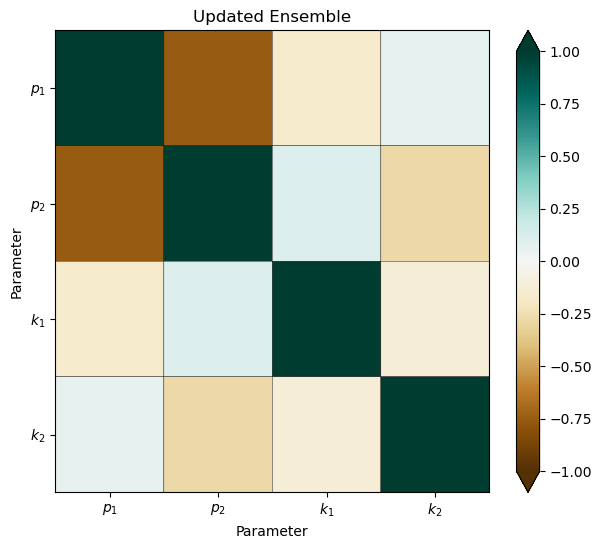

In [36]:
# Posterior covariance and correlation matrice and principal component analysis
XAcov=np.cov(Xanal)
XAcorr=np.corrcoef(Xanal)

plt.figure(figsize=(7,6))
#plt.pcolor(np.array(XAcov).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
plt.pcolor(np.array(XAcorr).T, edgecolors="k", cmap="BrBG", vmin=-1, vmax=1)
ymin, ymax = plt.ylim()
plt.ylim(ymax, ymin)
plt.colorbar(extend="both")
plt.title("Updated Ensemble")
plt.xlabel("Parameter")
plt.ylabel("Parameter")
plt.xticks(np.arange(0.5, 4 + 0.5), g_xlabels)
plt.yticks(np.arange(0.5, 4 + 0.5), g_xlabels)

[eigenvals,eigenvecs]=np.linalg.eig(XAcov)
print(eigenvals)
print(eigenvecs)

In [470]:
#np.save('ideal_ensemble_200_C2.npy',x_ens)